In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
def load_data():
    url='http://43.202.66.118:8015/all'
    r=requests.get(url)
    d=r.json()
    return d

In [3]:
data=load_data()
df=pd.DataFrame(data)

In [54]:
df['request_time']=pd.to_datetime(df['request_time'])
df['re_formatted_time']=df['request_time'].dt.strftime('%Y-%m-%d %H')
requestt=df.groupby('re_formatted_time').count()

In [55]:
df['prediction_time']=pd.to_datetime(df['prediction_time'])
df['pre_formatted_time']=df['prediction_time'].dt.strftime('%Y-%m-%d %H')
predictiont=df.groupby('pre_formatted_time').count()

print(predictiont)

                    num  file_name  label  file_path  request_time  \
pre_formatted_time                                                   
2024-09-25 03         1          1      1          1             1   
2024-09-25 10        10         10     10         10            10   
2024-09-25 11         9          9      9          9             9   
2024-09-25 12        31         31     31         31            31   
2024-09-25 14       192        192    192        192           192   
2024-09-25 15        50         50     50         50            50   
2024-09-25 16        11         11     11         11            11   

                    request_user  prediction_model  prediction_result  \
pre_formatted_time                                                      
2024-09-25 03                  1                 1                  1   
2024-09-25 10                 10                10                 10   
2024-09-25 11                  9                 9                  9   
2024

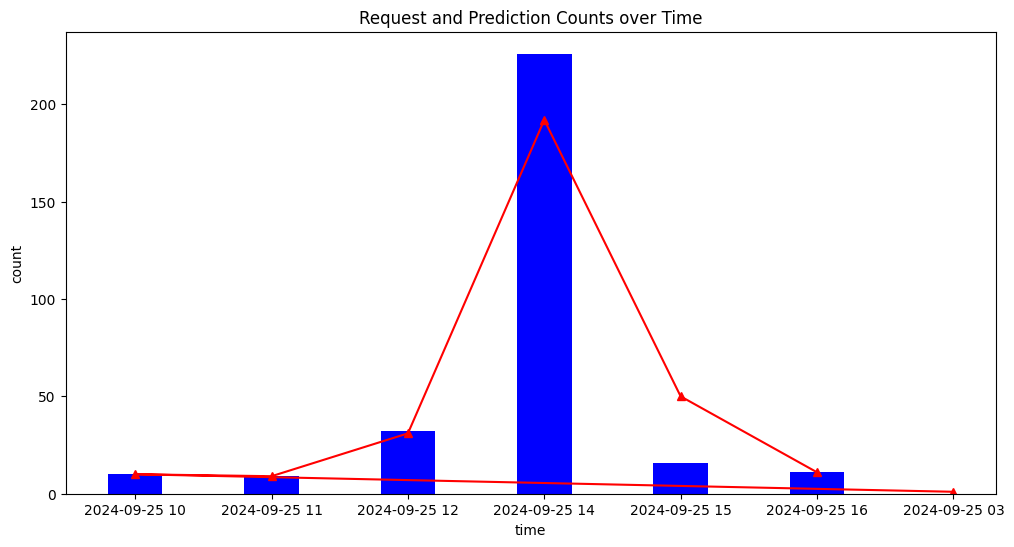

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.ion()
plt.bar(requestt.index, requestt['num'], width=0.4, label='request', color='blue', align='center')
plt.plot(predictiont.index, predictiont['num'], marker='^', label='predicton', color='red')

plt.title('Request and Prediction Counts over Time')
plt.xlabel('time')
plt.ylabel('count')

plt.show()

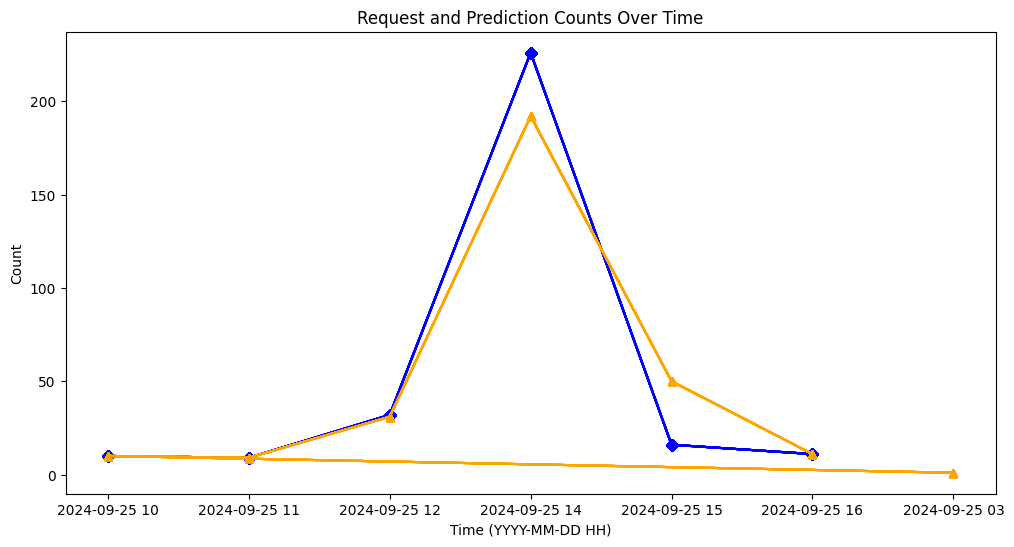

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.ion()
plt.plot(requestt.index, requestt.values, marker='D', label='request', color='blue')
plt.plot(predictiont.index, predictiont.values, marker='^', label='predicton', color='orange')
plt.title('Request and Prediction Counts Over Time')
plt.xlabel('Time (YYYY-MM-DD HH)')
plt.ylabel('Count')
plt.show()